Un piccolo confronto tra funzioni ricursive e non

In [2]:
from timeit import timeit # questo serve per i benchmark: non preoccupartene

Definiamo due funzioni che generano il n-esimo numero della sequenza di Fibonacci

In [5]:
# funzione "classica"
def fib_recursive(n):
    if n < 2:
        return n
    
    return fib_recursive(n-2) + fib_recursive(n-1)

# funzione non ricorsiva
def fib_nonrecursive(n):
    if n < 2:
        return n

    j, k = 0, 1
    for _ in range(n):
        j, k = k, j+k
    return j

Testiamo che funzionino

In [6]:
fib_recursive(20)

6765

In [7]:
fib_nonrecursive(20)

6765

Da Wikipedia (https://en.wikipedia.org/wiki/Fibonacci_number):
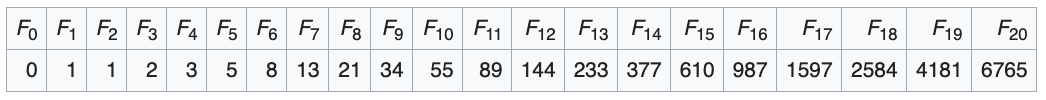

Direi che ci siamo. Facciamo calcolare alle funzioni questa cifra (il ventesimo numero) mille volte, e vediamo il tempo di esecuzione

In [8]:
timeit("fib_recursive(20)", number=1000, globals=globals())

3.524745252999992

In [9]:
timeit("fib_nonrecursive(20)", number=1000, globals=globals())

0.001804684000035195

Le cose peggiorano sensibilmente all'aumentare del numero che si vuole calcolare:

In [10]:
timeit("fib_recursive(25)", number=1000, globals=globals())

38.32385227499998

In [11]:
timeit("fib_nonrecursive(25)", number=1000, globals=globals())

0.002158307000001969

Il risultato è in secondi.

Per non parlare del fatto che, mentre esiste un limite hardware-dipendente al massimo calcolabile dalla funzione non ricorsiva, quella ricorsiva si schianterà molto prima contro il massimo delle volte che si può fare ricorso allo stack di Python, risutando (in tempi di esecuzione comunque biblici) in uno stupendo ```RecursionError```.

Dato che i tempi di esecuzione di ```fib_recursive()``` sono biblici, scrivo una funzioncina più easy per dimostrare la cosa:

In [13]:
def rec(n):
    if n < 1:
        return n
    
    return n + rec(n-1)

In [14]:
rec(10)

55

In [15]:
rec(100)

5050

In [23]:
rec(1000) # questo dovrebbe già schiantarsi! Poteri del mac

500500

In [29]:
rec(3000)

RecursionError: maximum recursion depth exceeded in comparison